In [ ]:
%pip install scikit-plot
%pip install matplotlib==3.4.0
%pip install seaborn
%pip install sklearn

In [493]:
MODEL_PATH = "./saved_models/"
MODEL_NAMES = ['AdaBoostClassifier', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'GaussianNB', 'GaussianProcessClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'MLPClassifier', 'SVC', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier']
PLOT_PATH = "./plots/"
evaluated_model = MODEL_NAMES[10]

# Definicje metryk

Confusion Matrix

In [494]:
from sklearn.metrics import confusion_matrix
def conf_matrix(test_target, prediction):
  matrix = confusion_matrix(test_target, prediction)
  tn, fp, fn, tp = matrix.ravel()
  plt.subplots(figsize=(10,10))
  sns.heatmap([[tp, fp], [fn, tn]], annot=True)
  return tn, fp, fn, tp

Błąd typu pierwszego | False positive rate

In [495]:
false_positive_rate = lambda fp, tn:  fp / (fp + tn)

Błąd typu drugiego | False negative rate


In [496]:
false_negative_rate = lambda fn, tp: fn / (tp + fn)

Specifity | True negative rate

In [497]:
true_negative_rate = lambda tn, fp: tn / (tn + fp)

Negative predictive value

In [498]:
negative_predictive_value = lambda tn, fn: tn / (tn + fn)

False discovery rate

In [499]:
false_discovery_rate = lambda fp, tp: fp/ (tp + fp)

Sensivity | Recall | True postive rate

In [500]:
recall_score = lambda tp, fn: tp / (tp + fn)

Precision | Positive predictive value

In [501]:
precision_score = lambda tp, fp: tp/ (tp + fp)

Accuracy

In [502]:
accuracy = lambda tp, fp, fn, tn: (tp + tn) / (tp + fp + fn + tn) 

F beta score

In [503]:
f_beta_score = lambda precision_score, recall_score, beta=0.5: (1 + np.square(beta)) * precision_score * recall_score / (np.square(beta) * precision_score + recall_score)

F1 score

In [504]:
f1_beta_score = lambda precision_score, recall_score: 2* precision_score * recall_score / (precision_score + recall_score)

F2 score

In [505]:
f2_beta_score = lambda precision_score, recall_score: 5 * precision_score * recall_score / (4*precision_score + recall_score)

Matthews correlation coefficient

In [506]:
from math import sqrt
matthew_correlation_coefficient = lambda tp, tn, fp, fn: (tp * tn - fp * fn)/sqrt((tp + fp)*(tp * fn)*(tn + fp)*(tn + fn))

Cohen Kappa

In [507]:
from sklearn.metrics import cohen_kappa_score
# cohen_kappa = cohen_kappa_score(test_target, prediction)

ROC AUC score

In [508]:
from sklearn.metrics import roc_auc_score
# roc_auc = roc_auc_score(test_target, prediction)

PR AUC | Average precision

In [509]:
from sklearn.metrics import average_precision_score
# average_precision = average_precision_score(test_target, prediction)

Log loss

In [510]:
from sklearn.metrics import log_loss
# loss = log_loss(test_target, prob_prediction)

Brier score

In [511]:
from sklearn.metrics import brier_score_loss
# brier_score = brier_score_loss(test_target, prediction)

ROC curve

In [512]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(test_target, prediction):
  fpr, tpr, thresholds = roc_curve(test_target, prediction)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr)

Precision-Recall curve

In [513]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_curve(test_target, prob_prediction):
  precision, recall, thresholds  =precision_recall_curve(test_target, prob_prediction)
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')
  plt.show()

Cumulative gain chart

In [514]:
from scikitplot.metrics import plot_cumulative_gain
# plot_cumulative_gain(test_target, prob_prediction)

**Lift** curve | Lift chart

In [515]:
from scikitplot.metrics import plot_lift_curve
# plot_lift_curve(test_target, prob_prediction)

Kolmogorov-Smirnov plot

In [516]:
from scikitplot.metrics import plot_ks_statistic
# plot_ks_statistic(test_target, prob_prediction)

Porównanie wysokości metryk

In [517]:
import matplotlib.pyplot as plt

def make_plot(list_1, list_2, plot_title, colors=None):
    figure, ax = plt.subplots()
    bars = ax.barh(list_1, list_2, color=colors)
    plt.title(f"{plot_title}")
    plt.savefig(f"{PLOT_PATH}{plot_title}")
    ax.bar_label(bars, label_type='center')
    plt.show()
    plt.clf()

# Ocena dla jednego modelu

## Przygotowanie modelu do oceny

In [518]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

Załadowanie danych

In [519]:
features, target = load_breast_cancer(return_X_y=True, as_frame=True)
data = features.join(target)
data = data.drop(columns=["mean texture", "texture error", "worst texture", "mean symmetry", "worst symmetry", "symmetry error", "mean fractal dimension", "fractal dimension error", "worst fractal dimension"])
data

,mean radius,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,concavity error,concave points error,worst radius,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,target
0,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,1.0950,8.589,153.40,...,0.05373,0.01587,25.380,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0
1,20.57,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.5435,3.398,74.08,...,0.01860,0.01340,24.990,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0
2,19.69,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.7456,4.585,94.03,...,0.03832,0.02058,23.570,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0
3,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.4956,3.445,27.23,...,0.05661,0.01867,14.910,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0
4,20.29,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.7572,5.438,94.44,...,0.05688,0.01885,22.540,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,1.1760,7.673,158.70,...,0.05198,0.02454,25.450,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0
565,20.13,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.7655,5.203,99.04,...,0.03950,0.01678,23.690,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0
566,16.60,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.4564,3.425,48.55,...,0.04730,0.01557,18.980,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0
567,20.60,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.7260,5.772,86.22,...,0.07117,0.01664,25.740,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0


In [520]:
train, test = train_test_split(data, random_state=47, test_size=0.4)

In [521]:
test_features = test.drop(columns="target")
test_target = test["target"]

Załadowanie modelu

In [522]:
with open(MODEL_PATH + evaluated_model, 'rb') as f:
    classifier = pickle.load(f)

Predykcja

In [523]:
prediction = classifier.predict(test_features)

In [524]:
prob_prediction = classifier.predict_proba(test_features)

## Metryki


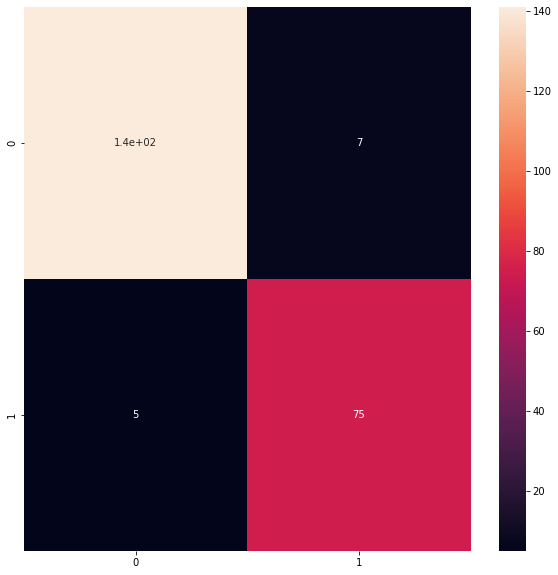

In [525]:
tn, fp, fn, tp = conf_matrix(test_target, prediction)

In [526]:
m_fpr = false_positive_rate(fp, tn)
m_fnr = false_negative_rate(fn, tp)
m_tnr = true_negative_rate(fn, tp)
m_npv = negative_predictive_value(tn, fn)
m_fdr = false_discovery_rate(fp, tp)
m_rs = recall_score(tp, fn)
m_ps = precision_score(tp, fp)
m_acc = accuracy(tp, fp, fn, tn)
m_fbs = f_beta_score(m_ps, m_rs)
m_f1bs = f1_beta_score(m_ps, m_rs)
m_f2bs = f2_beta_score(m_ps, m_rs)
m_mcc = matthew_correlation_coefficient(tp, tn, fp, fn)
m_cohen_kappa = cohen_kappa_score(test_target, prediction)
m_roc_auc =  roc_auc_score(test_target, prediction)
m_avg_prec =  average_precision_score(test_target, prediction)
m_log_loss = log_loss(test_target, prob_prediction)
m_brier_score = brier_score_loss(test_target, prediction)

In [527]:
print(f"False positive rate | Type-I error: {m_fpr} \n" +
      f"False negative rate | Type-II error: {m_fnr} \n" +
      f"True negative rate | Specificity: {m_tnr} \n" +
      f"Negative predicitve value: {m_npv} \n" +
      f"False discovery rate: {m_fdr} \n" +
      f"True positive rate | Recall | Sensivity: {m_rs} \n" +
      f"Positive predictive value | Precision: {m_ps} \n" +
      f"Accuracy: {m_acc} \n" +
      f"F beta score: {m_fbs} \n" +
      f"F1 score: {m_f1bs} \n" +
      f"F2 score: {m_f2bs} \n" +
      f"Cohen Kappa: {m_cohen_kappa} \n" +
      f"Matthews correlation coefficient: {m_mcc} \n" +
      f"ROC AUC score: {m_roc_auc} \n" +
      f"PR AUC | Average precision: {m_avg_prec} \n" +
      f"Log loss: {m_log_loss} \n" +
      f"Brier score: {m_brier_score} \n")

False positive rate | Type-I error: 0.08536585365853659 
False negative rate | Type-II error: 0.03424657534246575 
True negative rate | Specificity: 0.03424657534246575 
Negative predicitve value: 0.9375 
False discovery rate: 0.0472972972972973 
True positive rate | Recall | Sensivity: 0.9657534246575342 
Positive predictive value | Precision: 0.9527027027027027 
Accuracy: 0.9473684210526315 
F beta score: 0.9552845528455285 
F1 score: 0.9591836734693877 
F2 score: 0.9631147540983608 
Cohen Kappa: 0.8851192475646624 
Matthews correlation coefficient: 0.40286846609917953 
ROC AUC score: 0.940193785499499 
PR AUC | Average precision: 0.9420057223770274 
Log loss: 0.16198418806152623 
Brier score: 0.05263157894736842 



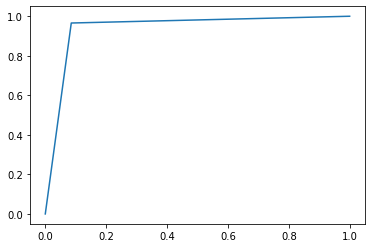

In [528]:
plot_roc_curve(test_target, prediction)

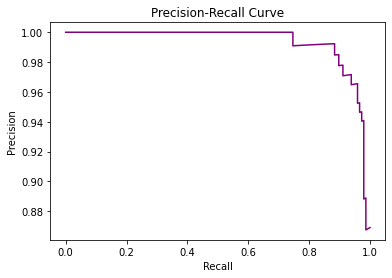

In [529]:
plot_precision_recall_curve(test_target, prob_prediction[:,1])

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

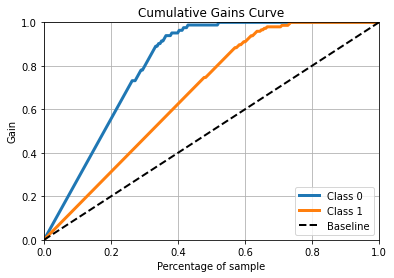

In [530]:
plot_cumulative_gain(test_target, prob_prediction)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

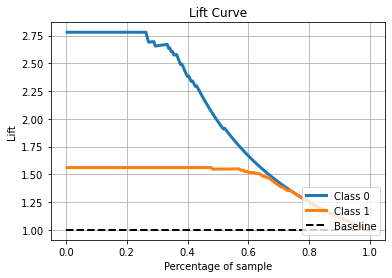

In [531]:
plot_lift_curve(test_target, prob_prediction)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

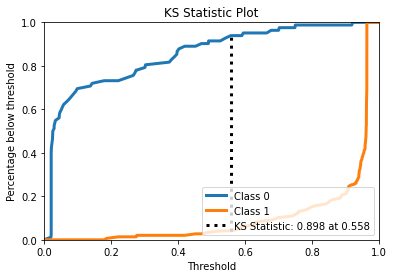

In [532]:
plot_ks_statistic(test_target, prob_prediction)

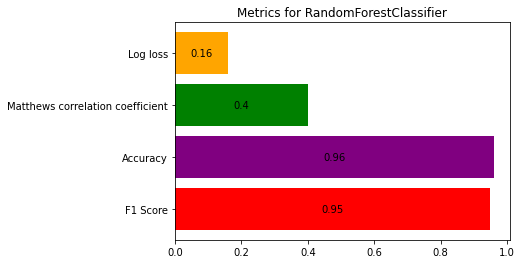

<Figure size 432x288 with 0 Axes>

In [533]:
x = ["F1 Score", "Accuracy", "Matthews correlation coefficient", "Log loss"]
y = [m_acc, m_f1bs, m_mcc, m_log_loss]
y = [round(m, 2) for m in y]
c = ["red", "purple", "green", "orange"]
make_plot(x, y, f"Metrics for {evaluated_model}", c)

# Porównanie modeli

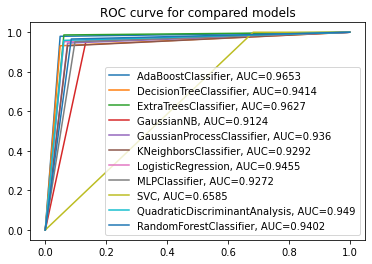

In [534]:
title = "ROC curve for compared models"
for name in MODEL_NAMES:
  with open(MODEL_PATH + name, 'rb') as f:
      classifier = pickle.load(f)
  prediction = classifier.predict(test_features)
  fpr, tpr, _ = roc_curve(test_target, prediction)
  auc = round(roc_auc_score(test_target, prediction), 4)
  plt.plot(fpr,tpr,label=f"{name}, AUC={auc}")
plt.legend()
plt.title(title)
plt.savefig(PLOT_PATH + title)